# Change over Time

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

fuel_econ = pd.read_csv('fuel-econ.csv')
fuel_econ.head()

,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,pv2,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,79,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,94,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6
2,32206,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,17.4935,21.2000,26.5716,35.1000,20.6716,429,5,5
3,32207,Volkswagen,CC 4motion,2013,Compact Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,16.9415,20.5000,25.2190,33.5000,19.8774,446,5,5
4,32208,Chevrolet,Malibu eAssist,2013,Midsize Cars,Front-Wheel Drive,Automatic (S6),Regular Gasoline,4,2.4,0,95,24.7726,31.9796,35.5340,51.8816,28.6813,310,8,8


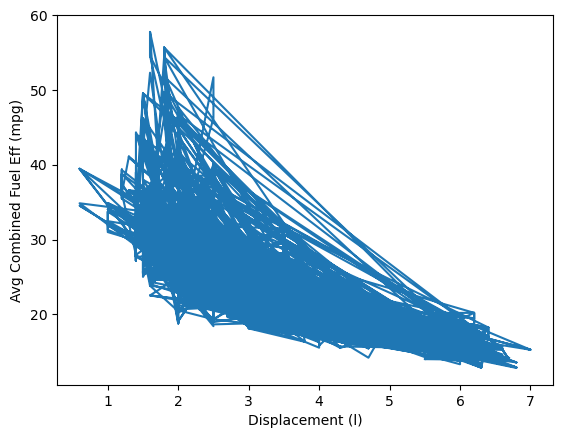

In [7]:
plt.errorbar(data=fuel_econ, x='displ', y='comb')
plt.xlabel('Displacement (l)')
plt.ylabel('Avg Combined Fuel Eff (mpg)');

# Data needs to be sorted... it's a scatterplot with lines

In [8]:
bins_e = np.arange(0.6, 7.1, 0.2) # edges
bins_c = bins_e[:-1]+0.1 # center

displ_binned = pd.cut(fuel_econ['displ'], bins_e, include_lowest=True)
displ_binned

0       (3.6, 3.8]
1       (1.8, 2.0]
2       (3.4, 3.6]
3       (3.4, 3.6]
4       (2.2, 2.4]
           ...    
3924    (1.6, 1.8]
3925    (1.8, 2.0]
3926    (1.8, 2.0]
3927    (3.2, 3.4]
3928    (3.2, 3.4]
Name: displ, Length: 3929, dtype: category
Categories (32, interval[float64, right]): [(0.599, 0.8] < (0.8, 1.0] < (1.0, 1.2] < (1.2, 1.4] ... (6.2, 6.4] < (6.4, 6.6] < (6.6, 6.8] < (6.8, 7.0]]

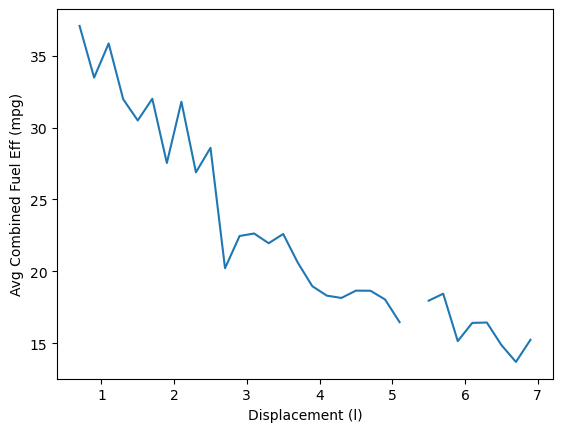

In [11]:
comb_mean = fuel_econ['comb'].groupby(displ_binned).mean()

plt.errorbar(x=bins_c, y=comb_mean)
plt.xlabel('Displacement (l)')
plt.ylabel('Avg Combined Fuel Eff (mpg)');

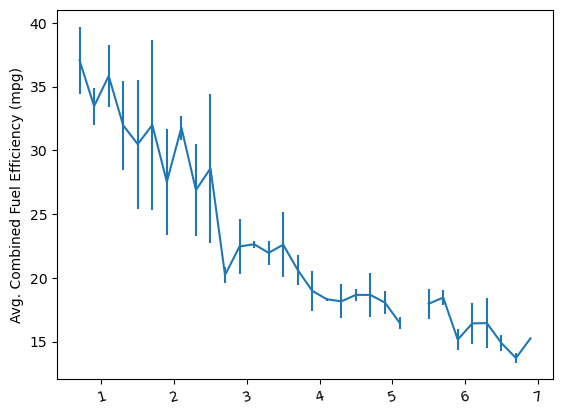

In [13]:
## For the points in each bin, we compute the mean and standard error of the mean.
comb_mean = fuel_econ['comb'].groupby(displ_binned).mean()
comb_std = fuel_econ['comb'].groupby(displ_binned).std()

## Plot the summarized data
plt.errorbar(x=bins_c, y=comb_mean, yerr=comb_std)
plt.xticks(rotation=15);
plt.ylabel('Avg. Combined Fuel Efficiency (mpg)');

/var/folders/hd/jwgpckjd2x129s8lwcqvhpth0000gn/T/ipykernel_13028/3146255524.py:3: FutureWarning: Dropping of nuisance columns in rolling operations is deprecated; in a future version this will raise TypeError. Select only valid columns before calling the operation. Dropped columns were Index(['VClass', 'drive', 'fuelType', 'make', 'model', 'trans'], dtype='object')
  x_winmean = df_window.mean()['year']
/var/folders/hd/jwgpckjd2x129s8lwcqvhpth0000gn/T/ipykernel_13028/3146255524.py:4: FutureWarning: Dropping of nuisance columns in rolling operations is deprecated; in a future version this will raise TypeError. Select only valid columns before calling the operation. Dropped columns were Index(['VClass', 'drive', 'fuelType', 'make', 'model', 'trans'], dtype='object')
  y_median = df_window.median()['cylinders']
/var/folders/hd/jwgpckjd2x129s8lwcqvhpth0000gn/T/ipykernel_13028/3146255524.py:5: FutureWarning: Dropping of nuisance columns in rolling operations is deprecated; in a future versi

Text(0, 0.5, 'cylinders')

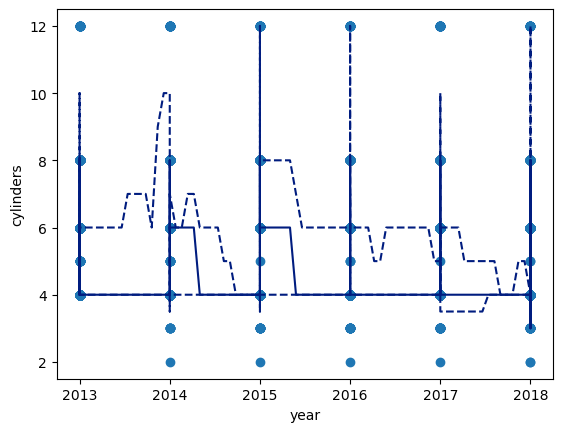

In [18]:
## compute statistics in a rolling window
df_window = fuel_econ.sort_values('year').rolling(15)
x_winmean = df_window.mean()['year']
y_median = df_window.median()['cylinders']
y_q1 = df_window.quantile(.25)['cylinders']
y_q3 = df_window.quantile(.75)['cylinders']

## plot the summarized data
base_color = sns.color_palette()[0]
line_color = sns.color_palette('dark')[0]
plt.scatter(data = fuel_econ, x = 'year', y = 'cylinders')
plt.errorbar(x = x_winmean, y = y_median, c = line_color)
plt.errorbar(x = x_winmean, y = y_q1, c = line_color, linestyle = '--')
plt.errorbar(x = x_winmean, y = y_q3, c = line_color, linestyle = '--')

plt.xlabel('year')
plt.ylabel('cylinders')